## Data Practicum 1

### Title of the project:  Wildfire Data Analysis

#### Submitted by - Hareesh Nair

In [1]:
# Importing libraries

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import os

# sklearn packages
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

# plotting
import seaborn as sns
import datetime as dt
import warnings
warnings.filterwarnings("ignore")
warnings.simplefilter('ignore')


### Data Preparation

* Data set is used from kaggle site with California wildfire data and weather data.

In [2]:

# Data loading
df_fire = pd.read_csv('Dataset/California_Fire_Incidents.csv')


In [3]:
df_fire.head()

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,...,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
0,257314.0,False,Stanislaus National Forest/Yosemite National Park,NaN,2013,True,/incidents/2013/8/17/rim-fire/,NaN,NaN,Tuolumne,...,"Rim Fire, Stanislaus National Forest, Yosemite...",2013-08-17T15:25:00Z,Finalized,NaN,NaN,NaN,NaN,5fb18d4d-213f-4d83-a179-daaf11939e78,2013-09-06T18:30:00Z,NaN
1,30274.0,False,USFS Angeles National Forest/Los Angeles Count...,NaN,2013,True,/incidents/2013/5/30/powerhouse-fire/,NaN,NaN,Los Angeles,...,"Powerhouse Fire, May 2013, June 2013, Angeles ...",2013-05-30T15:28:00Z,Finalized,NaN,NaN,NaN,NaN,bf37805e-1cc2-4208-9972-753e47874c87,2013-06-08T18:30:00Z,NaN
2,27531.0,False,CAL FIRE Riverside Unit / San Bernardino Natio...,NaN,2013,True,/incidents/2013/7/15/mountain-fire/,NaN,NaN,Riverside,...,"Mountain Fire, July 2013, Highway 243, Highway...",2013-07-15T13:43:00Z,Finalized,NaN,NaN,NaN,NaN,a3149fec-4d48-427c-8b2c-59e8b79d59db,2013-07-30T18:00:00Z,NaN
3,27440.0,False,Tahoe National Forest,NaN,2013,False,/incidents/2013/8/10/american-fire/,NaN,NaN,Placer,...,"American Fire, August 2013, Deadwood Ridge, Fo...",2013-08-10T16:30:00Z,Finalized,NaN,NaN,NaN,NaN,8213f5c7-34fa-403b-a4bc-da2ace6e6625,2013-08-30T08:00:00Z,NaN
4,24251.0,False,Ventura County Fire/CAL FIRE,NaN,2013,True,/incidents/2013/5/2/springs-fire/,Acreage has been reduced based upon more accur...,NaN,Ventura,...,"Springs Fire, May 2013, Highway 101, Camarillo...",2013-05-02T07:01:00Z,Finalized,6.0,10.0,NaN,NaN,46731fb8-3350-4920-bdf7-910ac0eb715c,2013-05-11T06:30:00Z,11.0


In [4]:
df_fire.shape

(1636, 40)

In [5]:
df_fire.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1636 entries, 0 to 1635
Data columns (total 40 columns):
AcresBurned             1633 non-null float64
Active                  1636 non-null bool
AdminUnit               1636 non-null object
AirTankers              28 non-null float64
ArchiveYear             1636 non-null int64
CalFireIncident         1636 non-null bool
CanonicalUrl            1636 non-null object
ConditionStatement      284 non-null object
ControlStatement        111 non-null object
Counties                1636 non-null object
CountyIds               1636 non-null object
CrewsInvolved           171 non-null float64
Dozers                  123 non-null float64
Engines                 191 non-null float64
Extinguished            1577 non-null object
Fatalities              21 non-null float64
Featured                1636 non-null bool
Final                   1636 non-null bool
FuelType                12 non-null object
Helicopters             84 non-null float64
Injuries

In [6]:
df_fire.isnull().sum().sort_values(ascending = False ).head(25)

StructuresEvacuated     1636
FuelType                1624
Fatalities              1615
AirTankers              1608
StructuresThreatened    1606
StructuresDamaged       1569
Helicopters             1552
ControlStatement        1525
Injuries                1516
Dozers                  1513
WaterTenders            1490
CrewsInvolved           1465
StructuresDestroyed     1461
Engines                 1445
PersonnelInvolved       1432
ConditionStatement      1352
SearchKeywords           203
Extinguished              59
SearchDescription         17
AcresBurned                3
PercentContained           3
Updated                    0
Latitude                   0
Active                     0
AdminUnit                  0
dtype: int64

In [7]:
pd.set_option('display.max_columns', 35)

In [8]:
columns_to_drop = ['Active','Featured', 'Final', 'PercentContained','Public', 'SearchKeywords', 'Status']
df_fire.drop(columns_to_drop, axis='columns', inplace=True)

In [9]:
df_fire['Started'] = pd.to_datetime(df_fire['Started'])
df_fire['Updated'] = pd.to_datetime(df_fire['Updated'])
df_fire['Extinguished'] = pd.to_datetime(df_fire['Extinguished'])

df_fire['YearStarted'] = df_fire['Started'].dt.year
df_fire['MonthStarted'] = df_fire['Started'].dt.month
df_fire = df_fire[df_fire.YearStarted != 1969]

In [10]:
df_fire.fillna({'AcresBurned': 0, 'AirTankers': 0, 'ConditionStatement':'', 'ControlStatement':'', 
                'CrewsInvolved': 0, 'Dozers': 0, 'Engines': 0, 'Extinguished': 0, 'Fatalities': 0,
               'FuelType':'', 'Helicopters': 0, 'Injuries': 0, 'PersonnelInvolved': 0,
               'SearchDescription':'', 'StructuresDamaged': 0, 'StructuresDestroyed': 0,
               'StructuresEvacuated': 0, 'StructuresThreatened': 0, 'WaterTenders': 0}, inplace=True)

In [11]:
df_fire['AcresBurned'] = df_fire['AcresBurned'].astype('int64')
df_fire['AirTankers'] = df_fire['AirTankers'].astype('int64')
df_fire['CrewsInvolved'] = df_fire['CrewsInvolved'].astype('int64')
df_fire['Dozers'] = df_fire['Dozers'].astype('int64')
df_fire['Engines'] = df_fire['Engines'].astype('int64')
df_fire['Fatalities'] = df_fire['Fatalities'].astype('int64')
df_fire['Injuries'] = df_fire['Injuries'].astype('int64')
df_fire['Helicopters'] = df_fire['Helicopters'].astype('int64')
df_fire['PersonnelInvolved'] = df_fire['PersonnelInvolved'].astype('int64')
df_fire['StructuresDamaged'] = df_fire['StructuresDamaged'].astype('int64')
df_fire['StructuresDestroyed'] = df_fire['StructuresDestroyed'].astype('int64')
df_fire['StructuresEvacuated'] = df_fire['StructuresEvacuated'].astype('int64')
df_fire['StructuresThreatened'] = df_fire['StructuresThreatened'].astype('int64')
df_fire['WaterTenders'] = df_fire['WaterTenders'].astype('int64')

In [12]:
def as_thousand(value):
    return value/1_000;

### Data Visualization

#### Count of Fire Incidents Between 2013 2019

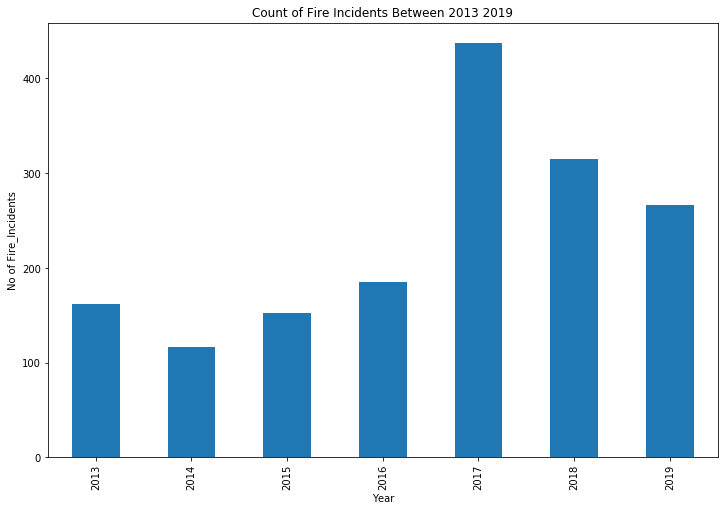

In [13]:
df_fire['YearStarted'].value_counts().sort_index().plot(kind='bar', figsize=(12,8))

plt.xlabel('Year')
plt.ylabel('No of Fire_Incidents')
plt.title('Count of Fire Incidents Between 2013 2019');

* 2017 Reported the largest in among these years

#### Frequency of Fire per Month Between 2013 and  2020

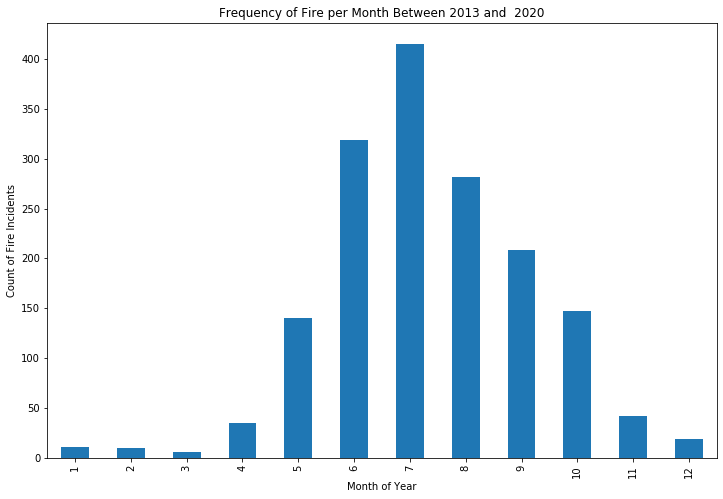

In [14]:
df_fire['MonthStarted'].value_counts().sort_index().plot(kind='bar', figsize=(12,8))

plt.xlabel('Month of Year')
plt.ylabel('Count of Fire Incidents')
plt.title('Frequency of Fire per Month Between 2013 and  2020');

* July month got more incidents

#### Acres Burned in Thousands by Year Between 2013 2019

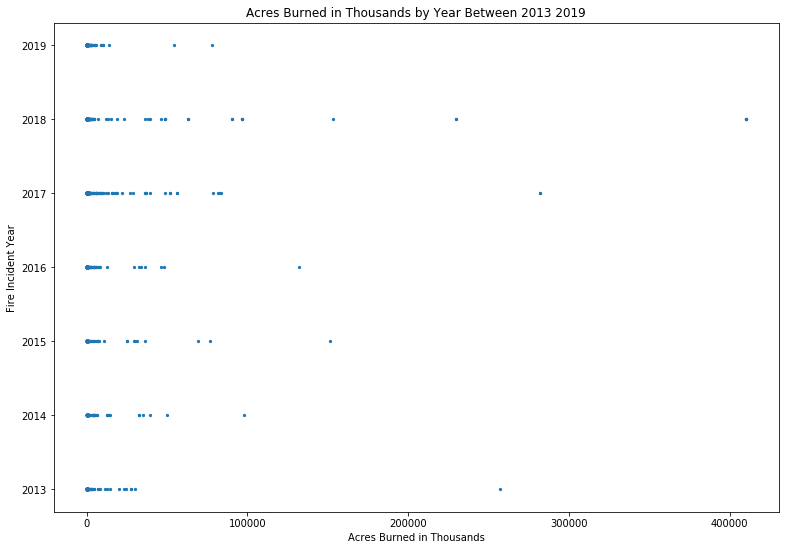

In [15]:
df_fire.plot(kind='scatter', x='AcresBurned', y='YearStarted', figsize=(13,9), s=5)

plt.xlabel('Acres Burned in Thousands')
plt.ylabel('Fire Incident Year')
plt.title('Acres Burned in Thousands by Year Between 2013 2019');

* 2018 got the most incidents

#### Fatalities caused in Each Year Between 2013 2019

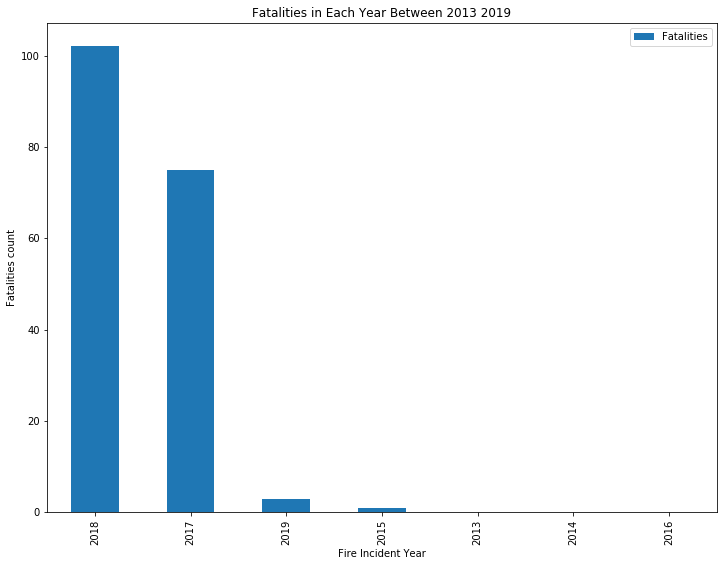

In [16]:
df_fire[['Fatalities', 'YearStarted']].groupby('YearStarted').sum().sort_values('Fatalities', ascending=False).plot(kind='bar', figsize=(12,9))

plt.xlabel('Fire Incident Year')
plt.ylabel('Fatalities count')
plt.title('Fatalities in Each Year Between 2013 2019');


* 2018 got more Fatalities even though the number of fires is lesser than 2017. And 2018 caused more damages.

#### Count of Fatalities caused by Acres Burned

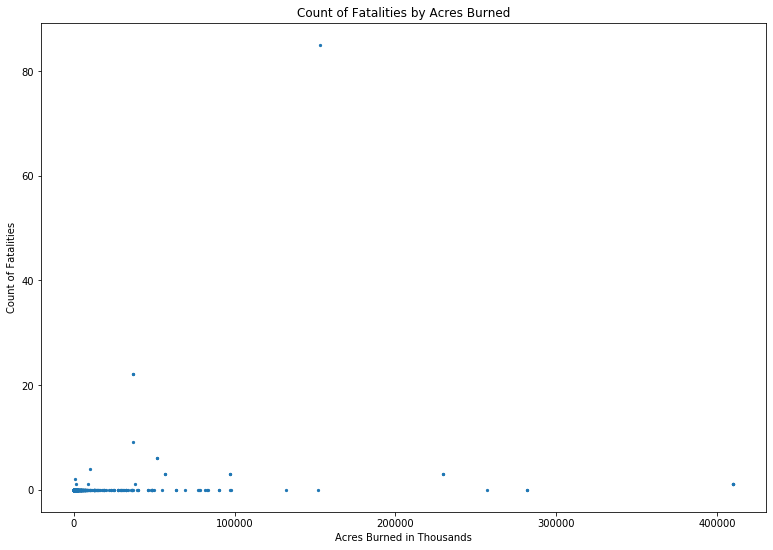

In [17]:
df_fire.plot(kind='scatter', x='AcresBurned', y='Fatalities', figsize=(13,9), s=5)

plt.xlabel('Acres Burned in Thousands')
plt.ylabel('Count of Fatalities')
plt.title('Count of Fatalities by Acres Burned');

#### Count of Structures in Danger by Acres Burned in Thousands

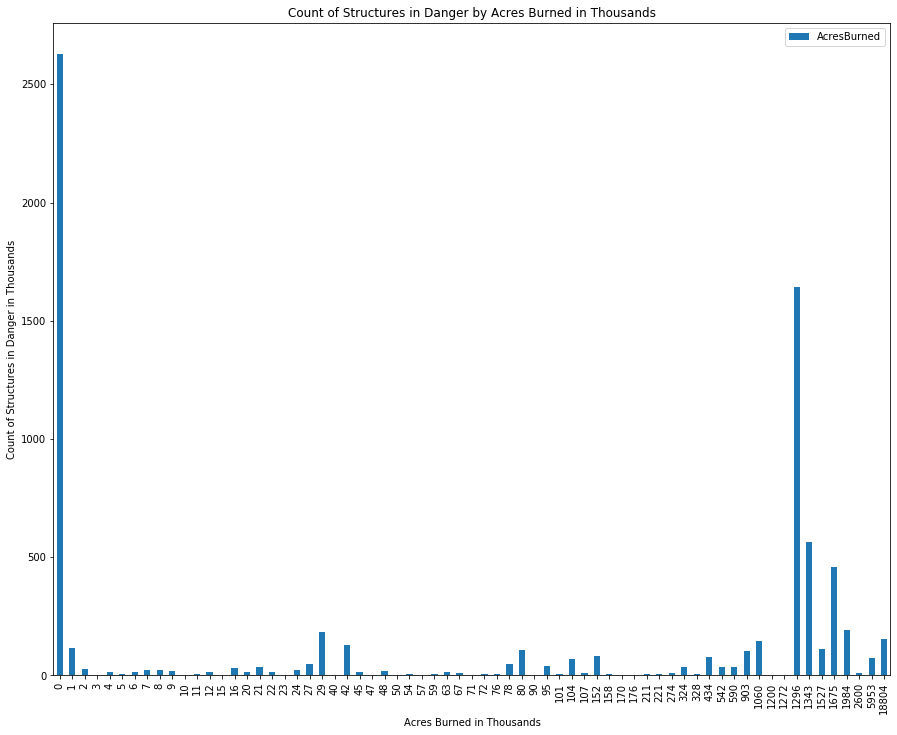

In [18]:
df_fire['Structures'] = (df_fire.StructuresDestroyed+df_fire.StructuresDamaged+df_fire.StructuresEvacuated+df_fire.StructuresThreatened)

df_fire[['Structures', 'AcresBurned']].groupby('Structures').sum().apply(as_thousand).plot(kind='bar', figsize=(15,12))

plt.xlabel('Acres Burned in Thousands')
plt.ylabel('Count of Structures in Danger in Thousands')
plt.title('Count of Structures in Danger by Acres Burned in Thousands');

* Other than single incidents , when there is more acerage involved there is more structural damages involved.

#### Top Fifteen Counties where Fires Occured Between 2013 and 2019

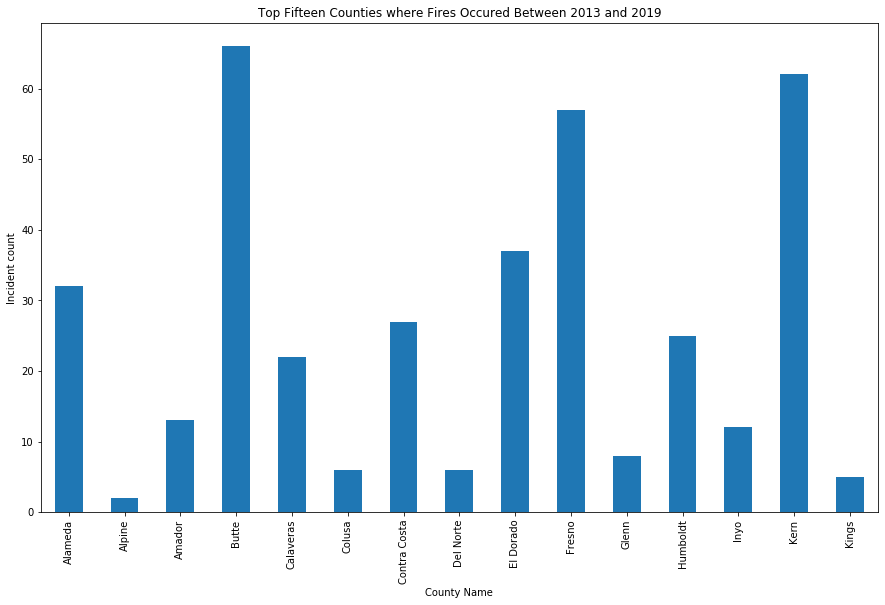

In [19]:
df_fire['Counties'].value_counts().sort_index().head(15).plot(kind='bar', figsize=(15,9))

plt.xlabel('County Name')
plt.ylabel('Incident count')
plt.title('Top Fifteen Counties where Fires Occured Between 2013 and 2019');

* The highest frequency is in Butte , kem and fresno counties.

#### Acres Burned in each County Between 2013 and 2019

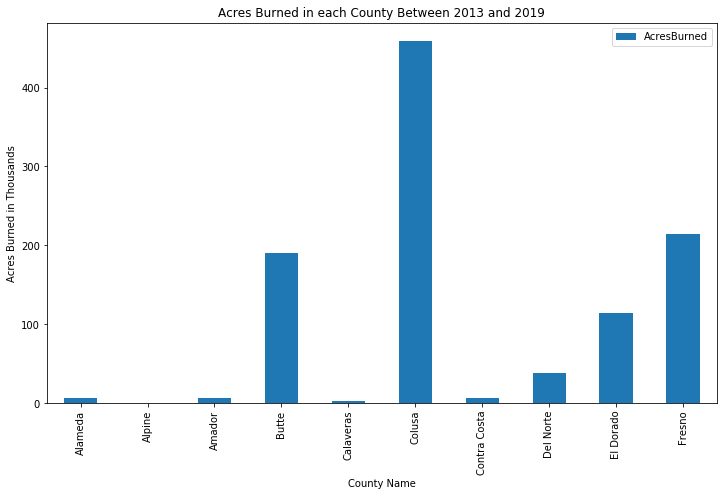

In [20]:
df_fire[['Counties', 'AcresBurned']].groupby('Counties').sum().head(10).apply(as_thousand).plot(kind='bar', figsize=(12,7)) 

plt.xlabel('County Name')
plt.ylabel('Acres Burned in Thousands')
plt.title('Acres Burned in each County Between 2013 and 2019');

* Colusa county had the most fire. 

#### Results of EDA analysis.

* Wild Fire is getting more frequent
* More and more acerage of land are getting burned each year.
* MOre death and destruction is reported each year.
* Changing climate is influencing the Damages.


### ML using Weather and California Fire data

#### Checking weather pattern in California versus wild fire and prediction of wild fire with sample data.

#### Data Preparation

In [21]:
df_weather = pd.read_csv('Dataset/WeatherEvents_Jan2016-Dec2021.csv')
print ("Loaded weather data : ", df_weather.head(1))

Loaded weather data :    EventId  Type Severity       StartTime(UTC)         EndTime(UTC)  \
0     W-1  Snow    Light  2016-01-06 23:14:00  2016-01-07 00:34:00   

   Precipitation(in)     TimeZone AirportCode  LocationLat  LocationLng  \
0                0.0  US/Mountain        K04V      38.0972    -106.1689   

       City    County State  ZipCode  
0  Saguache  Saguache    CO  81149.0  


In [22]:
df_weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7479165 entries, 0 to 7479164
Data columns (total 14 columns):
EventId              object
Type                 object
Severity             object
StartTime(UTC)       object
EndTime(UTC)         object
Precipitation(in)    float64
TimeZone             object
AirportCode          object
LocationLat          float64
LocationLng          float64
City                 object
County               object
State                object
ZipCode              float64
dtypes: float64(4), object(10)
memory usage: 798.9+ MB


In [23]:
df_weather.isnull().sum().sort_values(ascending = False ).head(25)

ZipCode              59234
City                 14563
State                    0
County                   0
LocationLng              0
LocationLat              0
AirportCode              0
TimeZone                 0
Precipitation(in)        0
EndTime(UTC)             0
StartTime(UTC)           0
Severity                 0
Type                     0
EventId                  0
dtype: int64

In [24]:
df_weather.shape

(7479165, 14)

In [25]:
# California Weather data

isCa = df_weather['State'] == 'CA'
df_ca = df_weather[isCa]
print("Count of CA Weather events:", df_ca.size)

Count of CA Weather events: 4331950


In [26]:

# weather data grouping

start = pd.DatetimeIndex(df_ca['StartTime(UTC)']);
end = pd.DatetimeIndex(df_ca['EndTime(UTC)']);
df_ca['Mean_Duration'] = (end-start).total_seconds()
df_ca['Year'] = start.year
df_ca['Month'] = start.month


grouped_data = df_ca.groupby(by=['Year','Month','Type','Severity'] ,as_index=False).agg({'Mean_Duration': "mean", 'EventId': "count"})
grouped_data['Count'] = grouped_data.EventId
caGrouped_data = grouped_data[['Year','Month','Type','Severity','Count',"Mean_Duration"]]
caGrouped_data.head(15)

,Year,Month,Type,Severity,Count,Mean_Duration
0,2016,1,Cold,Severe,179,22092.737430
1,2016,1,Fog,Moderate,887,4872.784667
2,2016,1,Fog,Severe,2170,4933.990783
3,2016,1,Precipitation,UNK,135,1651.111111
4,2016,1,Rain,Heavy,126,1879.523810
5,2016,1,Rain,Light,4428,5021.598916
6,2016,1,Rain,Moderate,1037,2777.820636
7,2016,1,Snow,Heavy,88,2449.772727
8,2016,1,Snow,Light,367,4676.239782
9,2016,1,Snow,Moderate,166,2068.554217


In [38]:
#Preparation of weather data set for ML

weather_types = [{'Type': 'Cold', 'Severity': 'Severe'},{'Type': 'Fog', 'Severity': 'Moderate'},{'Type': 'Fog', 'Severity': 'Severe'},{'Type': 'Precipitation', 'Severity': 'UNK'},
                {'Type': 'Rain', 'Severity': 'Heavy'},{'Type': 'Rain', 'Severity': 'Light'},{'Type': 'Rain', 'Severity': 'Moderate'},{'Type': 'Snow', 'Severity': 'Heavy'},
                {'Type': 'Snow', 'Severity': 'Light'},{'Type': 'Snow', 'Severity': 'Moderate'},{'Type': 'Storm', 'Severity': 'Severe'}]
columns = ['Count','Mean_Duration']

# Convert Data for every year.

def Fn_createYearSet(year, uniqueTypes):
    noOfMonths = 12
    array = [0.0]*(noOfMonths * len(uniqueTypes) * len(columns))
    
    isYear =  caGrouped_data['Year'] == year
    caYear = caGrouped_data[isYear]
    i=0
    for m in range(noOfMonths):
        isMonth =  caYear['Month'] == m+1
        caMonth = caYear[isMonth]
        for u in uniqueTypes:
            isType = caMonth['Type'] == u['Type']
            caType = caMonth[isType]
            isSeverity = caType['Severity'] == u['Severity']
            caSevType = caType[isSeverity]
            countSize = caSevType["Count"].size
            durationSize = caSevType["Mean_Duration"].size
            if countSize == 1:
                array[i] = caSevType["Count"].item()
            i = i + 1
            if durationSize == 1:
                array[i] = caSevType["Mean_Duration"].item()    
            i = i + 1
    return array

In [28]:
# Wild fire data

fire_df =pd.read_csv('Dataset/California_Fire_Incidents.csv')

# wildfire events for 2016 to 2019

isFireRecent = fire_df['ArchiveYear'].isin([2016,2017,2018,2019])
fireNew_df = fire_df[isFireRecent]
fireNew_df.head(10)

,AcresBurned,Active,AdminUnit,AirTankers,ArchiveYear,CalFireIncident,CanonicalUrl,ConditionStatement,ControlStatement,Counties,CountyIds,CrewsInvolved,Dozers,Engines,Extinguished,Fatalities,Featured,...,Longitude,MajorIncident,Name,PercentContained,PersonnelInvolved,Public,SearchDescription,SearchKeywords,Started,Status,StructuresDamaged,StructuresDestroyed,StructuresEvacuated,StructuresThreatened,UniqueId,Updated,WaterTenders
431,132127.0,False,US Forest Service - Los Padres National Forest,NaN,2016,True,/incidents/2016/7/22/soberanes-fire/,"As of August 26, CAL FIRE is no longer in unif...",NaN,Monterey,27,NaN,NaN,NaN,2016-10-13T11:30:00Z,NaN,False,...,-121.89938,True,Soberanes Fire,100.0,NaN,True,"The Sobranes Fire started on July 22, 2016 ea...","east of Sobranes Creek, 5 miles south of Carm...",2016-07-22T08:48:00Z,Finalized,NaN,NaN,NaN,NaN,977ac7ce-4204-4cd3-9f89-727142165261,2016-10-13T11:30:00Z,NaN
432,48019.0,False,Bureau of Land Management,NaN,2016,True,/incidents/2016/6/23/erskine-fire/,NaN,NaN,Kern,15,NaN,NaN,NaN,2016-07-11T09:40:00Z,NaN,False,...,-118.45628,False,Erskine Fire,100.0,NaN,True,"The Erskine Fire started on June 23, 2016 off ...","Erskine Fire, Kern County, Lake Isabella, June...",2016-06-23T15:51:00Z,Finalized,NaN,NaN,NaN,NaN,91816ff6-d4ec-4f31-8d40-bf2538aca09b,2016-07-11T09:40:00Z,NaN
433,46344.0,False,CAL FIRE San Luis Obispo Unit,NaN,2016,True,/incidents/2016/8/13/chimney-fire/,The Chimney fire is now fully contained. There...,All road closures have been lifted.,San Luis Obispo,40,NaN,NaN,NaN,2016-09-06T07:30:00Z,NaN,False,...,-120.98316,True,Chimney Fire,100.0,NaN,True,"The Chimney Fire started on August 13, 2016 at...","Chimney Fire, San Luis Obispo County, Lake Nac...",2016-08-13T16:03:00Z,Finalized,8.0,70.0,NaN,NaN,040d03d0-fbdd-438c-8174-f81e4a1bba57,2016-09-06T07:30:00Z,NaN
434,36274.0,False,San Bernardino National Forest,NaN,2016,True,/incidents/2016/8/16/blue-cut-fire/,Minimal fire behavior was observed overnight. ...,All evacuations orders have been lifted. Resi...,San Bernardino,36,21.0,6.0,47.0,2016-08-23T07:45:00Z,NaN,False,...,-117.49342,True,Blue Cut Fire,100.0,914.0,True,The Bluecut Fire started on August 16 off of I...,"off of I-15 and Hwy 138, north of San Bernardi...",2016-08-16T10:44:00Z,Finalized,3.0,321.0,NaN,NaN,ea5193a1-69bc-4684-bfcd-235c17d36756,2016-08-23T07:45:00Z,9.0
435,33867.0,False,USFS Klamath National Forest,NaN,2016,False,/incidents/2016/8/27/gap-fire/,NaN,NaN,Siskiyou,47,NaN,NaN,NaN,2016-08-28T18:15:00Z,NaN,False,...,-123.11800,False,Gap Fire,100.0,NaN,True,"The Gap Fire started on August 27, 2016 off Se...","Gap Fire, Siskiyou County",2016-08-27T18:00:00Z,Finalized,NaN,NaN,NaN,NaN,85683fd7-b507-4ec7-8bbd-fb7033a42665,2016-08-28T18:15:00Z,NaN
436,32606.0,False,Los Padres National Forest,NaN,2016,True,/incidents/2016/8/18/rey-fire/,NaN,NaN,Santa Barbara,42,NaN,NaN,NaN,2016-09-15T15:20:00Z,NaN,False,...,0.00000,False,Rey Fire,100.0,NaN,True,The Rey Fire started on August 18 off of Hwy 1...,"Hwy 154 and Paradise Rd, north of Santa Barbar...",2016-08-18T17:57:00Z,Finalized,NaN,NaN,NaN,NaN,dc3f57ff-a935-4c25-bbe3-e00eeb5b5f42,2016-09-15T15:20:00Z,NaN
437,29322.0,False,Sequoia National Forest,NaN,2016,False,/incidents/2016/8/16/cedar-fire/,NaN,NaN,Kern,15,NaN,NaN,NaN,2016-10-01T06:00:00Z,NaN,False,...,-118.56780,False,Cedar Fire,100.0,NaN,True,The Cedar Fire started on August 16 off of Hwy...,"off of Hwy 155 in the Greenhorn Mountains, wes...",2016-08-16T16:35:00Z,Finalized,NaN,NaN,NaN,NaN,e247e423-6171-4184-9dca-b373de703885,2016-10-01T06:00:00Z,NaN
438,12518.0,False,Vandenberg Air Force Base,NaN,2016,False,/incidents/2016/9/17/canyon-fire/,NaN,NaN,Santa Barbara,42,NaN,NaN,NaN,2016-09-27T14:00:00Z,NaN,False,...,-120.54421,False,Canyon Fire,100.0,NaN,True,"The Canyon Fire started on September 18, 2016 ...","Canyon Fire, Santa Ynez Ridge Road and Egress ...",2016-09-17T17:20:00Z,Finalized,NaN,NaN,NaN,NaN,f6afb8c4-32dc-4e6d-8d30-e6b7ccd4a62f,2016-09-27T14:00:00Z,NaN
439,

In [30]:
# Fire data grouping similar to weather data, group on month. 

start = pd.DatetimeIndex(fireNew_df['Started']);
fireNew_df['Month'] = start.month
groupedFire_df = fireNew_df.groupby(by=['ArchiveYear','Month'] ,as_index=False).agg({'AcresBurned': "sum",'Active':'count'})
groupedFire_df['Count'] = groupedFire_df.Active
caGroupedFire = groupedFire_df[['ArchiveYear','Month','AcresBurned','Count']]
caGroupedFire.head(6)



,ArchiveYear,Month,AcresBurned,Count
0,2016,4,231.0,4
1,2016,5,8904.0,16
2,2016,6,92616.0,40
3,2016,7,145672.0,45
4,2016,8,212946.0,43
5,2016,9,34008.0,30


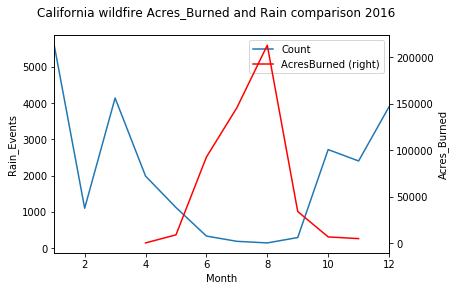

<Figure size 72x72 with 0 Axes>

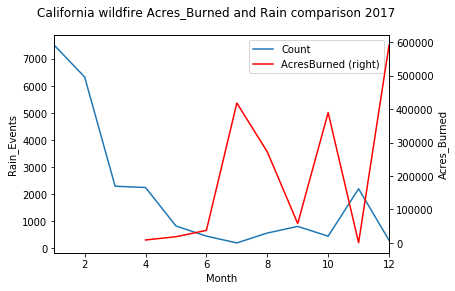

<Figure size 72x72 with 0 Axes>

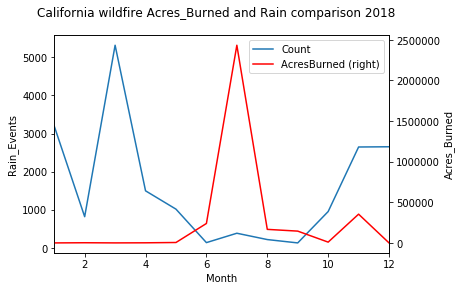

<Figure size 72x72 with 0 Axes>

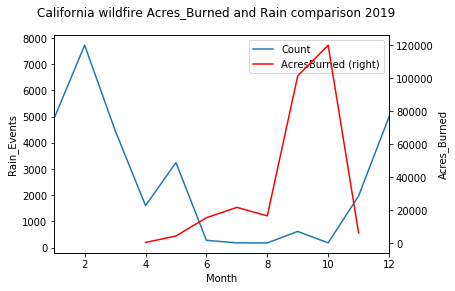

<Figure size 72x72 with 0 Axes>

In [34]:
import scipy.stats as stats
import matplotlib.pyplot as plt


#Comparison of Rain and acres burned each year.



for year in [2016,2017,2018,2019]:
  

    caGroupType_data = caGrouped_data.groupby(by=['Type','Month','Year'] ,as_index=False).agg({'Mean_Duration': "mean", 'Count': "sum"})
    dtRain= caGroupType_data["Type"] =="Rain"
    dtYear= caGroupType_data["Year"] ==year
    rain = caGroupType_data[dtRain][dtYear]


    
    renameFire = caGroupedFire.rename(columns={'ArchiveYear': 'Year','Count' :'FireEventCount'})
    isFireYear= renameFire["Year"] == year
    renameFire = renameFire[isFireYear]
    dtFireRaindata = pd.merge(rain, renameFire,  how='left', left_on=['Month','Year'], right_on = ['Month','Year'])


   ## Plot for  Rain and acrerage burning comparison
    
    ax = plt.gca()
    dtFireRaindata.plot(kind='line',x='Month',y='Count',ax=ax)
    plt.ylabel("Rain_Events")
    dtFireRaindata.plot(secondary_y=True,kind='line',x='Month',y='AcresBurned',color='red', ax=ax)
    plt.ylabel("Acres_Burned")
    plt.suptitle("California wildfire Acres_Burned and Rain comparison " + str(year))
    plt.figure(figsize=(1,1))
    plt.show()

In [35]:
# Grouping data per year

DtgroupedFireYear = caGroupedFire.groupby(by=['ArchiveYear'] ,as_index=False).agg({'AcresBurned': "sum",'Count':'sum'})
mean = DtgroupedFireYear[['AcresBurned']].mean()
DtgroupedFireYear['BadYear'] =DtgroupedFireYear['AcresBurned'] >  mean.item()
DtgroupedFireYear.head(5)

,ArchiveYear,AcresBurned,Count,BadYear
0,2016,505927.0,185,False
1,2017,1793915.0,438,True
2,2018,3358049.0,316,True
3,2019,285708.0,266,False


In [36]:
# Expected output Y for ML

DttrainingFireYears = DtgroupedFireYear[DtgroupedFireYear['ArchiveYear'].isin([2016,2017,2018])]
DttrainingYTransposed = DttrainingFireYears.BadYear.to_frame().T.astype(float)
DttrainingY = np.reshape(DttrainingYTransposed.to_numpy(), (3,1))
print(DttrainingY)

[[0.]
 [1.]
 [1.]]


In [39]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

# ML model for prediction of 2019.

input2016 = Fn_createYearSet(2016,weather_types) 
input2017 = Fn_createYearSet(2017,weather_types) 
input2018 = Fn_createYearSet(2018,weather_types)  
input2019 = Fn_createYearSet(2019,weather_types)

firstLayerSize = len(input2016)
secondLayerSize = 90
thirdLayerSize = 40
outputSize = 1

print("Model ") 
print(" Input layer size : "+ str(len(input2016)))

inputs = keras.Input(shape=(len(input2016),))
dense1 = layers.Dense(firstLayerSize, activation="sigmoid")(inputs)
dense2 = layers.Dense(secondLayerSize, activation="relu")(dense1)
dense3 = layers.Dense(thirdLayerSize, activation="relu")(dense2)
outputs = layers.Dense(outputSize, activation="sigmoid")(dense3)

model = keras.Model(inputs=inputs, outputs=outputs, name="learnModel")
model.summary()

opt = keras.optimizers.SGD(lr=0.05, momentum=0.5)
model.compile(loss='mean_squared_error', optimizer=opt,metrics=["accuracy"])

DttrainingX = np.array([input2016,input2017,input2018])
model.fit(DttrainingX,DttrainingY,batch_size=3, epochs=40)

test_scores = model.evaluate(DttrainingX, DttrainingY, verbose=2)
print("Test loss:", test_scores[0])
print("Test accuracy:", test_scores[1])


model.predict([input2019])


Model 
 Input layer size : 264
Model: "learnModel"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 264)]             0         
_________________________________________________________________
dense (Dense)                (None, 264)               69960     
_________________________________________________________________
dense_1 (Dense)              (None, 90)                23850     
_________________________________________________________________
dense_2 (Dense)              (None, 40)                3640      
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 41        
Total params: 97,491
Trainable params: 97,491
Non-trainable params: 0
_________________________________________________________________
Epoch 1/40
1/1 [==============================] - 0s 437ms/step - loss: 0.4695 - accura

array([[0.860163]], dtype=float32)

### Conclusion

* Received Accuracy of 86% from this test data.
* This can be improved by using more dataset and multiple iteration of execution.
* This model can be further tuned and can be used for prediction.

        

#### Data sets used
    
* "https://www.kaggle.com/sandstorm0123/wildfires-in-california-prediction/data?select=US_WeatherEvents_2016-2019.csv"
* "https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020"
            
#### Code Reference 

* "https://www.kaggle.com/sandstorm0123/wildfires-in-california-prediction/data"
* "https://www.kaggle.com/ananthu017/california-wildfire-incidents-20132020"
    
